In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['font.family'] = 'malgunsl'
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings('ignore')

In [23]:
test = pd.read_csv('titanic.csv', index_col=0)
print(test.shape)
test.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

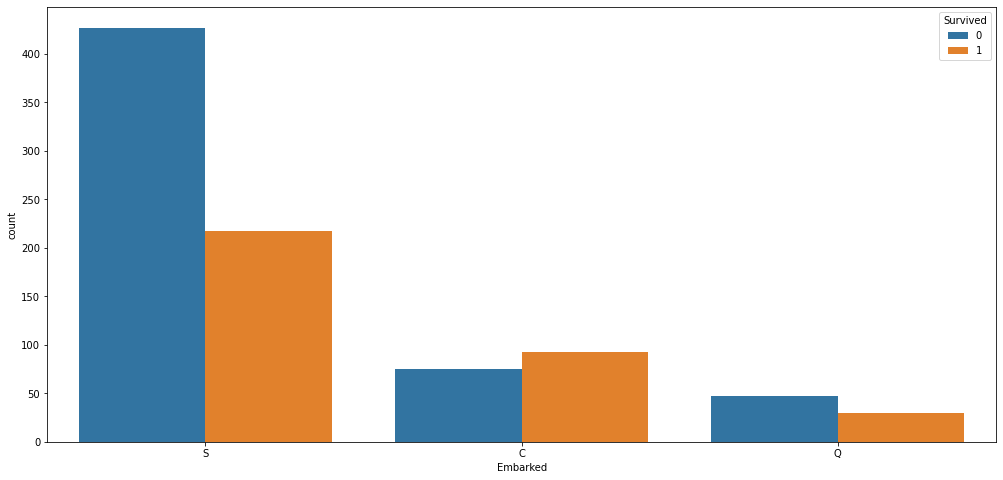

In [25]:
sns.countplot(data=test, x='Embarked', hue='Survived')

In [26]:
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
test.loc[test.Embarked.isnull(), 'Embarked'] = 'S'
test.Embarked = test.Embarked.fillna("S")
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [28]:
# Embarked 의 SCQ 비율 그래프로

# sns.barplot(x=test.Embarked.value_counts().index, 
#             y=test.Embarked.value_counts().values*100/(test.Embarked.value_counts().values.sum())
#             )

test.Embarked.value_counts()/test.shape[0] *100



S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

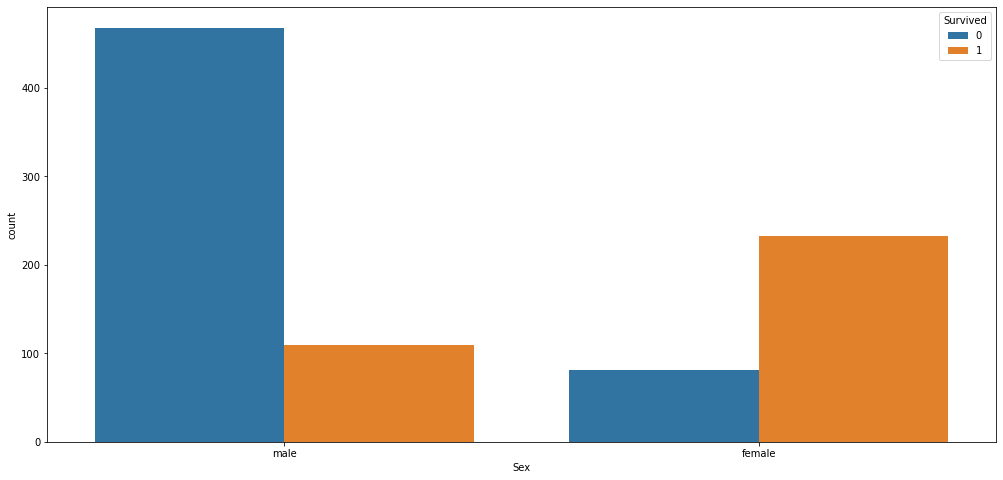

In [29]:
sns.countplot(data= test, x='Sex',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

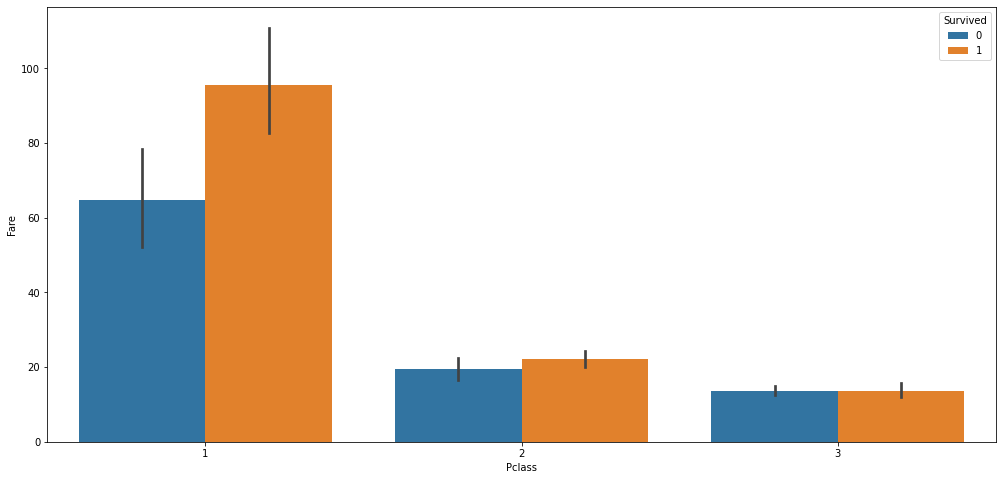

In [30]:
sns.barplot(data=test,x='Pclass', y='Fare', hue='Survived')

In [31]:
# 요금이 500불 이상인 사람의 데이터
test[test.Fare > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [32]:
test.loc[test.Fare > 500, 'Fare'] = test.loc[test.Fare > 500, 'Fare']/3

In [33]:
test.iloc[258]

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                     35.0
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                170.7764
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object

In [34]:
perish = test[test.Survived ==0]
survivor = test[test.Survived==1]

<AxesSubplot:xlabel='Fare', ylabel='Density'>

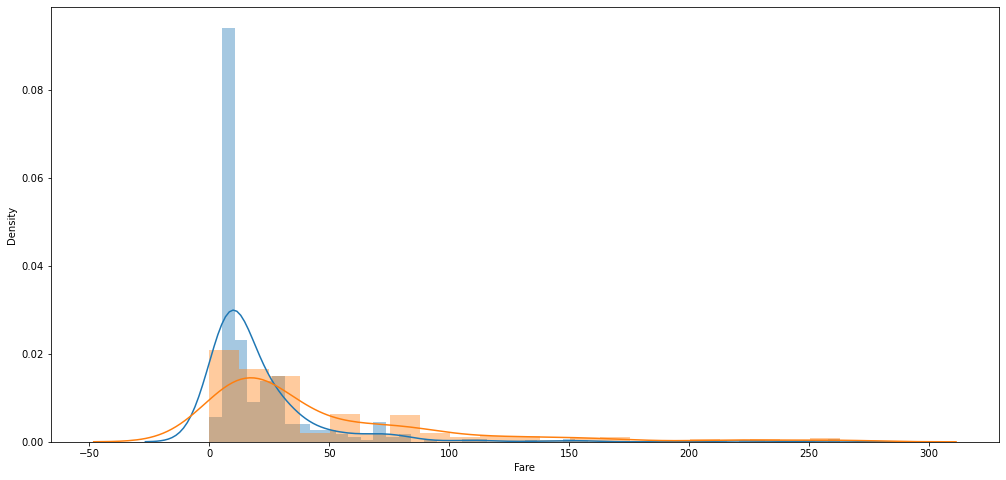

In [35]:
sns.distplot(perish.Fare,label='Perish')
sns.distplot(survivor.Fare,label='Survivor')

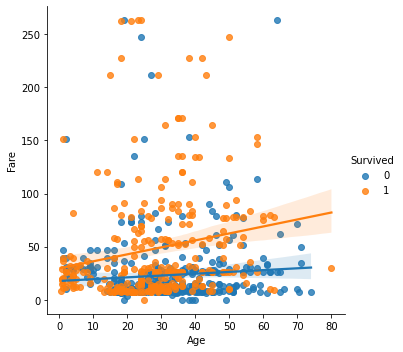

In [36]:
sns.lmplot(data=test, x='Age', y='Fare', hue='Survived')

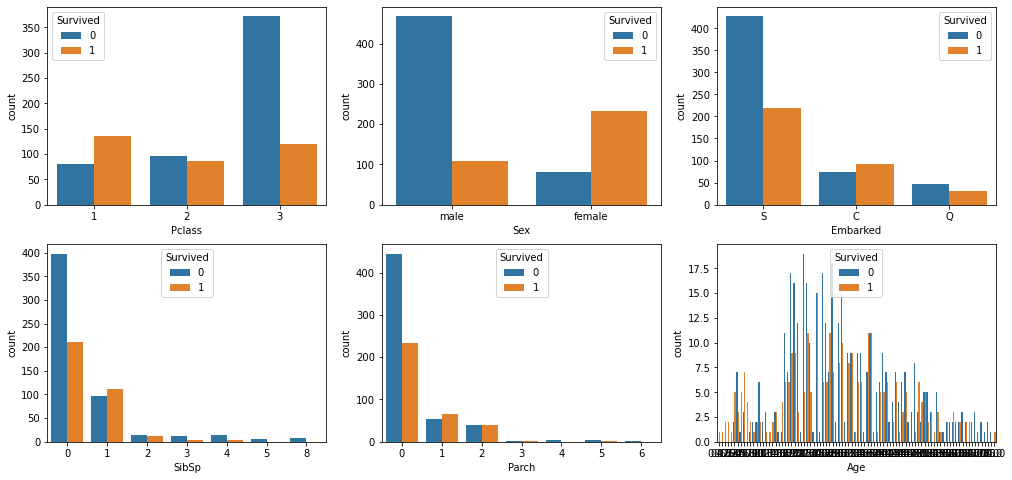

In [37]:
f, ((ax1,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(nrows=2, ncols=3)
sns.countplot(data=test, x='Pclass',hue='Survived',ax=ax1)
sns.countplot(data=test, x='Sex',hue='Survived',ax=ax2)
sns.countplot(data=test, x='Embarked',hue='Survived',ax=ax3)
sns.countplot(data=test, x='SibSp',hue='Survived',ax=ax4)
sns.countplot(data=test, x='Parch',hue='Survived',ax=ax5)
sns.countplot(data=test, x='Age',hue='Survived',ax=ax6)

plt.savefig('titanic.pdf')

In [38]:
test['Family_size'] = test.SibSp + test.Parch
test.drop(columns=['SibSp','Parch'])

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S,3


In [39]:
test.loc[test.Family_size ==0, 'Alone'] = 1
test.loc[test.Family_size !=0, 'Alone'] = 0
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0


<AxesSubplot:xlabel='Family_size', ylabel='count'>

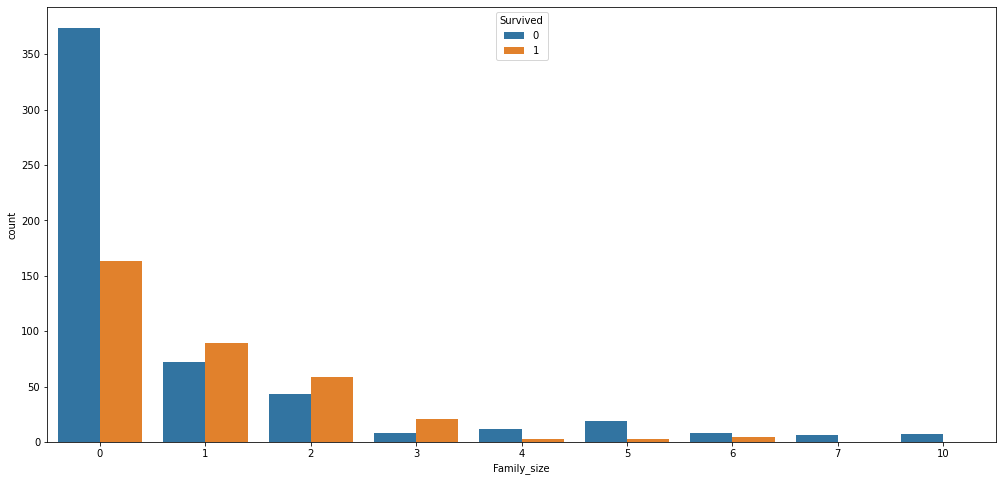

In [40]:
sns.countplot(data=test,x='Family_size',hue='Survived')